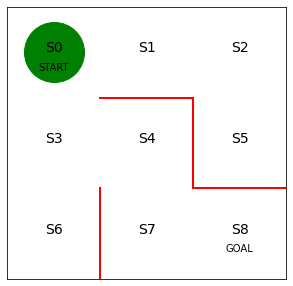

In [1]:

# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8은 목표지점이므로 정책이 없다
                    ])

In [5]:
a,b=theta_0.shape
Q=np.random.rand(a,b)*theta_0
print(Q)
print(theta_0)

[[       nan 0.98863864 0.1224934         nan]
 [       nan 0.66294608        nan 0.20401723]
 [       nan        nan 0.33538722 0.39025419]
 [0.37654549 0.11083025 0.70632082        nan]
 [       nan        nan 0.76207823 0.84284009]
 [0.5270625         nan        nan        nan]
 [0.79490496        nan        nan        nan]
 [0.78387731 0.22144404        nan        nan]]
[[nan  1.  1. nan]
 [nan  1. nan  1.]
 [nan nan  1.  1.]
 [ 1.  1.  1. nan]
 [nan nan  1.  1.]
 [ 1. nan nan nan]
 [ 1. nan nan nan]
 [ 1.  1. nan nan]]


In [10]:
def simple_convert_pi_from_theta(theta):
    m,n=theta.shape
    pi=np.zeros((m,n))
    for i in range(m):
        pi[i,:]=np.nan_to_num(theta[i,:])/np.nansum(theta[i,:])
    return pi

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [13]:
def Q_learning(s,a,r,s_next,Q,eta,gamma):
    if s_next== 8:
        Q[s,a]+=eta*(r-Q[s,a])
    else:
        Q[s,a]+=eta*(r+gamma*np.nanmax(Q[s_next,:])-Q[s,a])
    return Q

In [25]:
def get_action(s,Q,epsilion,pi_0):
    a_next=-1
    num=[0,1,2,3]
    if np.random.rand()<epsilion:
        a_next=np.random.choice(num,p=pi_0[s,:])
    else:
        a_next=np.nanargmax(Q[s,:])
    return a_next

In [31]:
def get_s_next(s,a,Q,epsilion,pi_0):

    direction=["up","right","down","left"]
    next_direction=direction[a]
    if next_direction == "up":
        s_next=s-3
    elif next_direction == "right":
        s_next=s+1
    elif next_direction == "down":
        s_next=s+3
    elif next_direction == "left":
        s_next=s-1
    return s_next

In [32]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # 시작 지점
    a = a_next = get_action(s, Q, epsilon, pi)  # 첫 번째 행동
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        a = a_next  # 행동 결정

        s_a_history[-1][1] = a
        # 현재 상태(마지막이므로 인덱스가 -1)을 히스토리에 추가

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 다음 단계의 상태를 구함

        s_a_history.append([s_next, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다

        # 보상을 부여하고 다음 행동을 계산함
        if s_next == 8:
            r = 1  # 목표 지점에 도달했다면 보상을 부여
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 다음 행동 a_next를 계산

        # 가치함수를 수정
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)

        # 종료 여부 판정
        if s_next == 8:  # 목표 지점에 도달하면 종료
            break
        else:
            s = s_next

    return [s_a_history, Q]

In [41]:
eta = 0.1  # 학습률
gamma = 0.9  # 시간할인율
epsilon = 0.5  # ε-greedy 알고리즘 epsilon 초깃값
v = np.nanmax(Q, axis=1)  # 각 상태마다 가치의 최댓값을 계산
is_continue = True
episode = 1
pi_0=simple_convert_pi_from_theta(theta_0)
V = []  # 에피소드 별로 상태가치를 저장
V.append(np.nanmax(Q, axis=1))  # 상태 별로 행동가치의 최댓값을 계산
while is_continue:  # is_continue의 값이 False가 될 때까지 반복
    print("에피소드: " + str(episode))

    # ε 값을 조금씩 감소시킴
    epsilon = epsilon / 2

    # Sarsa 알고리즘으로 미로를 빠져나온 후, 결과로 나온 행동 히스토리와 Q값을 변수에 저장
    s_a_history, Q = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 상태가치의 변화
    new_v = np.nanmax(Q, axis=1)  # 각 상태마다 행동가치의 최댓값을 계산
    print(new_v)
    print(np.sum(np.abs(new_v - v)))  # 상태가치 함수의 변화를 출력
    v = new_v

    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

    # 100 에피소드 반복
    episode = episode + 1
    if episode > 100:
        break

에피소드: 1
[0.729      0.40893202 0.34492883 0.81       0.9        0.34547927
 0.43116794 1.        ]
6.900924276465048e-12
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 2
[0.729      0.40893202 0.34492883 0.81       0.9        0.34547927
 0.43116794 1.        ]
6.272093955317359e-12
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 3
[0.729      0.40893202 0.34492883 0.81       0.9        0.34547927
 0.43116794 1.        ]
5.700329097635404e-12
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 4
[0.729      0.40893202 0.34492883 0.81       0.9        0.34547927
 0.43116794 1.        ]
5.180411655203443e-12
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 5
[0.729      0.40893202 0.34492883 0.81       0.9        0.34547927
 0.43116794 1.        ]
4.708011758225439e-12
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 6
[0.729      0.40893202 0.34492883 0.81       0.9        0.34547927
 0.43116794 1.        ]
4.278355447695503e-12
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 7
[0.729      0.40893202 0.34492883 0.81       0.9        0.34547927
 0.43116794 1.        ]
3

In [44]:
# 상태가치의 변화를 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm  # color map


def init():
    # 배경색 초기화
    line.set_data([], [])
    return (line,)


def animate(i):
    # 프레임 단위로 그림을 그림
    # 각 칸에 상태가치 값으로 결정된 색을 칠함
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85)  # S8
    return (line,)


# 초기화 함수와 프레임 단위로 그림을 그리는 함수로 애니메이션을 생성
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())